In [51]:
from pycaret.classification import load_model
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [33]:
df = pd.read_csv("seoul_preprocessed.csv")

In [34]:
train_areas = ['강남구', '마포구', '서초구', '영등포구']
train_df = df[df['SIG_KOR_NM'].isin(train_areas)]
test_df = df[~df['SIG_KOR_NM'].isin(train_areas)]


In [37]:
# test를 제외한 데이터로 risk level 추출
df_nonzero = train_df[train_df['tow_count'] > 0]
df_nonzero = df_nonzero[df_nonzero['tow_count'] > 0]

# `tow_count` 값으로 정렬
df_nonzero = df_nonzero.sort_values(by='tow_count')

# 0을 제외한 데이터
total_nonzero = len(df_nonzero)

mid_end = int(total_nonzero*1/2) # 절반

# 각 구간 끝값 (경계)
mid_end_value = df_nonzero.iloc[mid_end - 1]['tow_count']  # 가운데 구간 끝값

print(f"가운데 구간 끝값: {mid_end_value}\n")

test_df['risk_level'] = test_df['tow_count'].apply(
    lambda x: 0 if x == 0 else (1 if x <= mid_end_value else 2)
)

# 결과 확인
print(test_df[['tow_count', 'risk_level']].tail())

가운데 구간 끝값: 2

       tow_count  risk_level
44085          0           0
44086          0           0
44087          0           0
44088          0           0
44089          0           0


In [39]:
features = test_df.columns[3:-2]
target = 'risk_level'
del test_df['tow_count']
X_test, y_test   = test_df[features], test_df[target]

In [41]:
model4 = load_model('domain_specific_model_4')

Transformation Pipeline and Model Successfully Loaded


In [45]:
pred4 = model4.predict(X_test)

In [49]:
f1 = f1_score(y_test, pred4, average ="weighted")
print(f"f1_score: {f1:.4f}")

f1_score: 0.7152


클래스 0


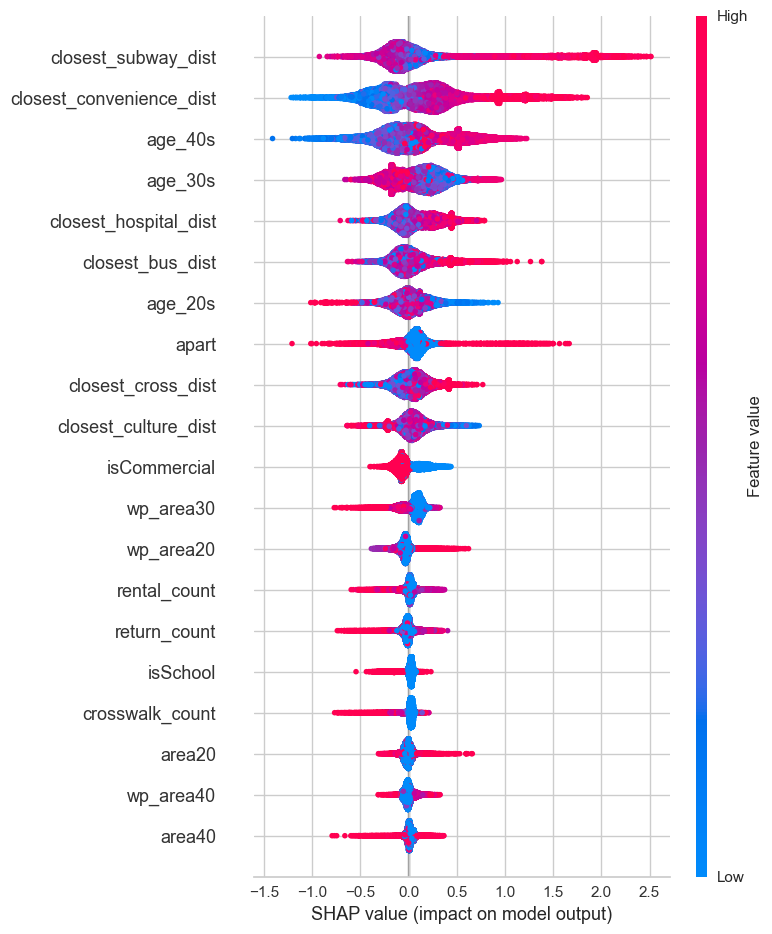

클래스 1


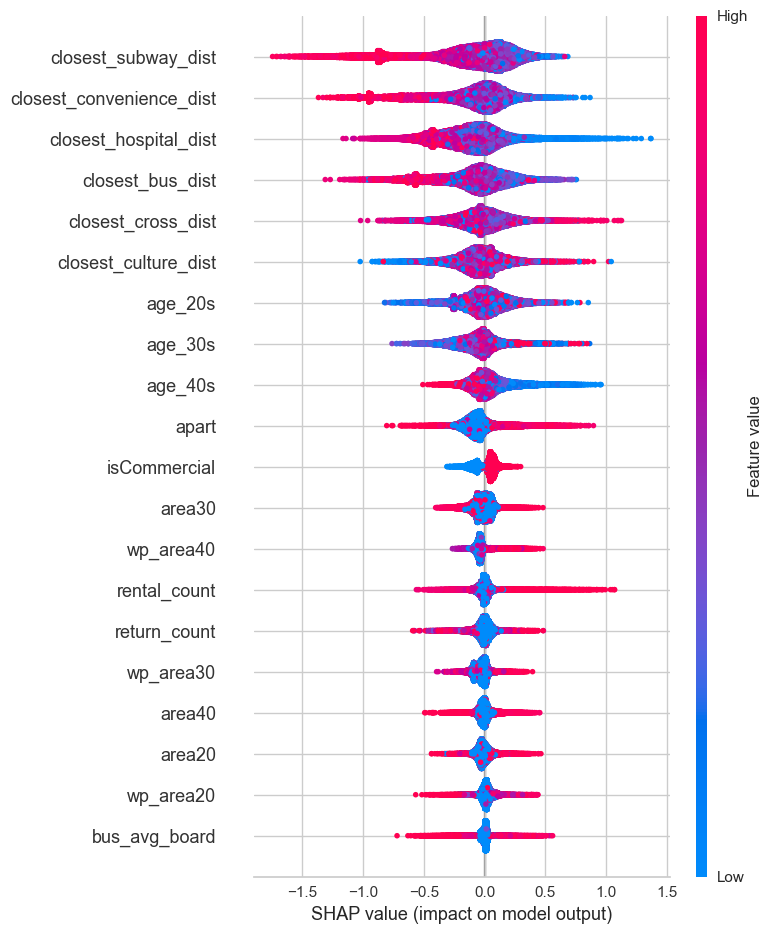

클래스 2


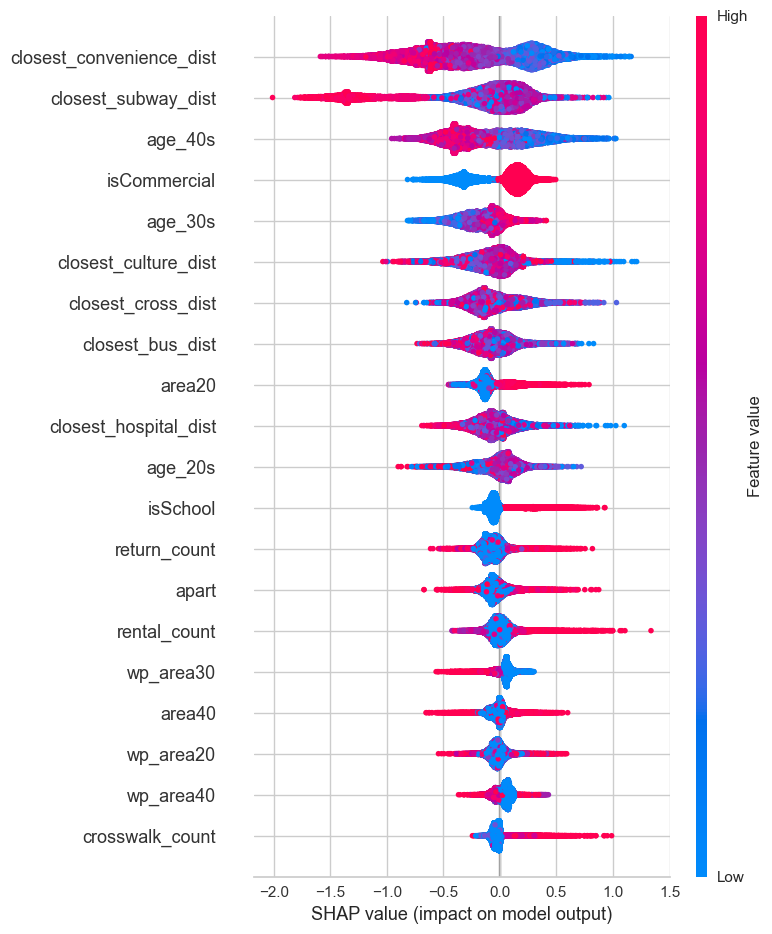

In [98]:
import shap
X_test_transformed = model4[:-1].transform(X_test)

explainer = shap.Explainer(model4.steps[-1][1])
shap_values = explainer(X_test_transformed)

for class_idx in range(shap_values.values.shape[2]):
    print(f"클래스 {class_idx}")
    plt.figure(figsize=(8, 4))
    shap.summary_plot(shap_values.values[:, :, class_idx], X_test_transformed)

# 특화모델 클래스별 지도매핑

In [59]:
import folium

In [61]:
test_df

SIG_KOR_NM  centroid_lat  centroid_lon  isSchool  rental_count  \
0            강서구     37.555328    126.765147         0      0.000000   
1            강서구     37.555768    126.765465         0      0.000000   
2            강서구     37.555308    126.766217         0      0.000000   
3            강서구     37.555945    126.766239         0      0.000000   
4            강서구     37.552600    126.768528         0      0.000000   
...          ...           ...           ...       ...           ...   
44085        강동구     37.559698    127.181465         0      0.000000   
44086        강동구     37.560583    127.181469         0      2.690696   
44087        강동구     37.561451    127.181354         1      2.690696   
44088        강동구     37.562344    127.181173         1      2.690696   
44089        강동구     37.547077    127.182561         0      0.000000   

       return_count     apart  closest_hospital_dist  \
0          0.000000  0.000000               7.955399   
1          0.000000  0.000000               7.941459   
2          0.000000  0.000000               7.923215   
3          0.000000  0.000000               7.915868   
4          0.000000  0.000000               7.889078   
...             ...       ...                    ...   
44085      0.000000  6.543912               5.271444   
44086      2.748098  0.000000               5.409370   
44087      2.748098  0.000000               5.623504   
44088      2.748098  5.849325               5.855798   
44089      0.000000  0.000000               6.636389   

       closest_convenience_dist  closest_culture_dist  ...  subway_avg_board  \
0                      8.020145              8.518302  ...               0.0   
1                      8.007402              8.508414  ...               0.0   
2                      7.989793              8.502376  ...               0.0   
3                      7.983490              8.494468  ...               0.0   
4                      7.911432              8.502308  ...               0.0   
...                         ...                   ...  ...               ...   
44085                  5.456324              7.651541  ...               0.0   
44086                  5.512638              7.661538  ...               0.0   
44087                  5.656577              7.668494  ...               0.0   
44088                  5.807178              7.675263  ...               0.0   
44089                  6.258974              7.728194  ...               0.0   

       subway_avg_alight  area20  area30  area40  wp_area20  wp_area30  \
0                    0.0     0.0     0.0     0.0        0.0        0.0   
1                    0.0     0.0     0.0     0.0        0.0        0.0   
2                    0.0     0.0     0.0     0.0        0.0        0.0   
3                    0.0     0.0     0.0     0.0        0.0        0.0   
4                    0.0     0.0     0.0     0.0        0.0        0.0   
...                  ...     ...     ...     ...        ...        ...   
44085                0.0     0.0     0.0     0.0        0.0        0.0   
44086                0.0     0.0     0.0     0.0        0.0        0.0   
44087                0.0     0.0     0.0     0.0        0.0        0.0   
44088                0.0     0.0     0.0     0.0        0.0        0.0   
44089                0.0     0.0     0.0     0.0        0.0        0.0   

       wp_area40  isCommercial  risk_level  
0            0.0             0           0  
1            0.0             0           0  
2            0.0             0           0  
3            0.0             0           0  
4            0.0             0           0  
...          ...           ...         ...  
44085        0.0             0           0  
44086        0.0             0           0  
44087        0.0             0           0  
44088        0.0             0           0  
44089        0.0             0           0  

[34099 rows x 31 columns]

In [69]:
m = folium.Map(location=[test_df['centroid_lat'].mean(), test_df['centroid_lon'].mean()], zoom_start=13)

# 각 pred 배열에서 값이 0인 위치만 찍기
for name, (pred_array, color) in preds.items():
    fg = folium.FeatureGroup(name=f'{name} == 2')  # layer 이름
    for i, val in enumerate(pred_array):
        
        if val == 2:
            lat = test_df.iloc[i]['centroid_lat']
            lon = test_df.iloc[i]['centroid_lon']

            folium.CircleMarker(
                location=[lat, lon],
                radius=6,
                color='red',
                fill=True,
                fill_color='red',
                fill_opacity=0.7,
                popup=f"{name}: 0"
            ).add_to(fg)

    fg.add_to(m)  # 지도에 레이어 추가
    
for name, (pred_array, color) in preds.items():
    fg_1 = folium.FeatureGroup(name=f'{name} == 1')
    for i, val in enumerate(pred_array):
        if val == 1:
            lat = test_df.iloc[i]['centroid_lat']
            lon = test_df.iloc[i]['centroid_lon']
            folium.CircleMarker(
                location=[lat, lon],
                radius=6,
                color="yellow",  # 중위험 색상 지정
                fill=True,
                fill_color="yellow",
                fill_opacity=0.5,
                popup=f"{name}: 1"
            ).add_to(fg_1)
    fg_1.add_to(m)
    
fg_real = folium.FeatureGroup(name='real')
for i, risk in enumerate(test_df['risk_level']):
    if risk == 2:
        lat = test_df.iloc[i]['centroid_lat']
        lon = test_df.iloc[i]['centroid_lon']
        folium.CircleMarker(
            location=[lat, lon],
            radius=6,
            color="white",
            fill=True,
            fill_color="black",
            fill_opacity=0.5,
            popup=f"{name}: 0"
        ).add_to(fg_real)
fg_real.add_to(m) 
folium.LayerControl(collapsed=False).add_to(m)

m

In [71]:
m.save("only_high_risk_map.html")

In [81]:
test_df['pred'] = pred4

In [85]:
test_df.to_csv("final_prediction.csv", index=False)

In [87]:
d = pd.read_csv("final_prediction.csv")

In [93]:
d[50:]

SIG_KOR_NM  centroid_lat  centroid_lon  isSchool  rental_count  \
50           강서구     37.558161    126.772979         0      0.000000   
51           강서구     37.558926    126.772972         0      0.000000   
52           강서구     37.559515    126.773358         0      0.000000   
53           강서구     37.549240    126.774279         0      0.000000   
54           강서구     37.550004    126.774265         0      0.000000   
...          ...           ...           ...       ...           ...   
34094        강동구     37.559698    127.181465         0      0.000000   
34095        강동구     37.560583    127.181469         0      2.690696   
34096        강동구     37.561451    127.181354         1      2.690696   
34097        강동구     37.562344    127.181173         1      2.690696   
34098        강동구     37.547077    127.182561         0      0.000000   

       return_count     apart  closest_hospital_dist  \
50         0.000000  0.000000               7.652580   
51         0.000000  0.000000               7.645443   
52         0.000000  0.000000               7.624462   
53         0.000000  0.000000               7.787318   
54         0.000000  0.000000               7.767164   
...             ...       ...                    ...   
34094      0.000000  6.543912               5.271444   
34095      2.748098  0.000000               5.409370   
34096      2.748098  0.000000               5.623504   
34097      2.748098  5.849325               5.855798   
34098      0.000000  0.000000               6.636389   

       closest_convenience_dist  closest_culture_dist  ...  subway_avg_alight  \
50                     7.740952              8.355381  ...                0.0   
51                     7.735336              8.344838  ...                0.0   
52                     7.716774              8.329733  ...                0.0   
53                     7.670272              8.471168  ...                0.0   
54                     7.679517              8.459138  ...                0.0   
...                         ...                   ...  ...                ...   
34094                  5.456324              7.651541  ...                0.0   
34095                  5.512638              7.661538  ...                0.0   
34096                  5.656577              7.668494  ...                0.0   
34097                  5.807178              7.675263  ...                0.0   
34098                  6.258974              7.728194  ...                0.0   

       area20  area30  area40  wp_area20  wp_area30  wp_area40  isCommercial  \
50        0.0     0.0     0.0        0.0        0.0        0.0             0   
51        0.0     0.0     0.0        0.0        0.0        0.0             0   
52        0.0     0.0     0.0        0.0        0.0        0.0             0   
53        0.0     0.0     0.0        0.0        0.0        0.0             0   
54        0.0     0.0     0.0        0.0        0.0        0.0             0   
...       ...     ...     ...        ...        ...        ...           ...   
34094     0.0     0.0     0.0        0.0        0.0        0.0             0   
34095     0.0     0.0     0.0        0.0        0.0        0.0             0   
34096     0.0     0.0     0.0        0.0        0.0        0.0             0   
34097     0.0     0.0     0.0        0.0        0.0        0.0             0   
34098     0.0     0.0     0.0        0.0        0.0        0.0             0   

       risk_level  pred  
50              0     0  
51              0     0  
52              0     0  
53              0     0  
54              0     0  
...           ...   ...  
34094           0     0  
34095           0     0  
34096           0     0  
34097           0     0  
34098           0     0  

[34049 rows x 32 columns]